# Lesson 16: Visualizing Data

In this section, we learn to scrape data from the network, store the data in a database and then read the data from the database to produce in in-browser visualization of the data.

So far we have been learning the Python language and then learning how to use Python, the network, and databases to manipulate data.

In this chapter, we take a look at three complete applications that bring all of these things together to manage and visualize data. You might use these applications as sample code to help get you started in solving a real-world problem.

Each of the applications is a ZIP file that you can download and extract onto your computer and execute.

[Video: Visualization - Geodata - Part 1](<https://www.youtube.com/watch?v=gy6l4DTv1KU>)

## Building an OpenStreetMap From Geocoded Data

In this project, we are using the OpenStreetMap geocoding API to clean up some user-entered geographic locations of university names and then placing the data on an actual OpenStreetMap.

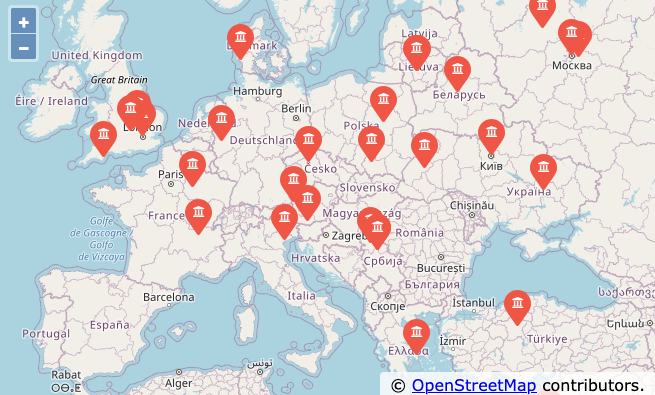
An OpenStreetMap

To get started, download the application from:

<www.py4e.com/code3/opengeo.zip>

The first problem to solve is that these geocoding APIs are rate-limited to a certain number of requests per day. If you have a lot of data, you might need to stop and restart the lookup process several times. So we break the problem into two phases.

In the first phase we take our input "survey" data in the file where.data and read it one line at a time, and retrieve the geocoded information from Google and store it in a database geodata.sqlite. Before we use the geocoding API for each user-entered location, we simply check to see if we already have the data for that particular line of input. The database is functioning as a local "cache" of our geocoding data to make sure we never ask Google for the same data twice.

You can restart the process at any time by removing the file geodata.sqlite.

Run the geoload.py program. This program will read the input lines in where.data and for each line check to see if it is already in the database. If we don't have the data for the location, it will call the geocoding API to retrieve the data and store it in the database.

Here is a sample run after there is already some data in the database:

```
Found in database AGH University of Science and Technology

Found in database Academy of Fine Arts Warsaw Poland

Found in database American University in Cairo

Found in database Arizona State University

Found in database Athens Information Technology

Retrieving https://py4e-data.dr-chuck.net/
   opengeo?q=BITS+Pilani
Retrieved 794 characters {"type":"FeatureColl

Retrieving https://py4e-data.dr-chuck.net/
   opengeo?q=Babcock+University
Retrieved 760 characters {"type":"FeatureColl

Retrieving https://py4e-data.dr-chuck.net/
   opengeo?q=Banaras+Hindu+University
Retrieved 866 characters {"type":"FeatureColl
...
```

The first five locations are already in the database and so they are skipped. The program scans to the point where it finds new locations and starts retrieving them.

The geoload.py program can be stopped at any time, and there is a counter that you can use to limit the number of calls to the geocoding API for each run. Given that the where.data only has a few hundred data items, you should not run into the daily rate limit, but if you had more data it might take several runs over several days to get your database to have all of the geocoded data for your input.

Once you have some data loaded into geodata.sqlite, you can visualize the data using the geodump.py program. This program reads the database and writes the file where.js with the location, latitude, and longitude in the form of executable JavaScript code.

A run of the geodump.py program is as follows:

```
AGH University of Science and Technology, Czarnowiejska,
Czarna Wieś, Krowodrza, Kraków, Lesser Poland
Voivodeship, 31-126, Poland 50.0657 19.91895

Academy of Fine Arts, Krakowskie Przedmieście,
Northern Śródmieście, Śródmieście, Warsaw, Masovian
Voivodeship, 00-046, Poland 52.239 21.0155
...
260 lines were written to where.js
Open the where.html file in a web browser to view the data.
```

The file where.html consists of HTML and JavaScript to visualize a Google map. It reads the most recent data in where.js to get the data to be visualized. Here is the format of the where.js file:

```
myData = [
[50.0657,19.91895,
'AGH University of Science and Technology, Czarnowiejska,
Czarna Wieś, Krowodrza, Kraków, Lesser Poland
Voivodeship, 31-126, Poland '],
[52.239,21.0155,
'Academy of Fine Arts, Krakowskie Przedmieściee,
Śródmieście Północne, Śródmieście, Warsaw,
Masovian Voivodeship, 00-046, Poland'],
   ...
];
```

This is a JavaScript variable that contains a list of lists. The syntax for JavaScript list constants is very similar to Python, so the syntax should be familiar to you.

Simply open where.html in a browser to see the locations. You can hover over each map pin to find the location that the geocoding API returned for the user-entered input. If you cannot see any data when you open the where.html file, you might want to check the JavaScript or developer console for your browser.

### [Video: Worked Example: Geodata](<https://www.youtube.com/watch?v=mt03Z2QjndQ>)

## Visualizing Networks and Interconnections

### [Video: Visualization - Page Rank - Part 2](<https://www.youtube.com/watch?v=x2KMFkvDtI8>)

In this application, we will perform some of the functions of a search engine. We will first spider a small subset of the web and run a simplified version of the Google page rank algorithm to determine which pages are most highly connected, and then visualize the page rank and connectivity of our small corner of the web. We will use the D3 JavaScript visualization library http://d3js.org/ to produce the visualization output.

You can download and extract this application from:

www.py4e.com/code3/pagerank.zip

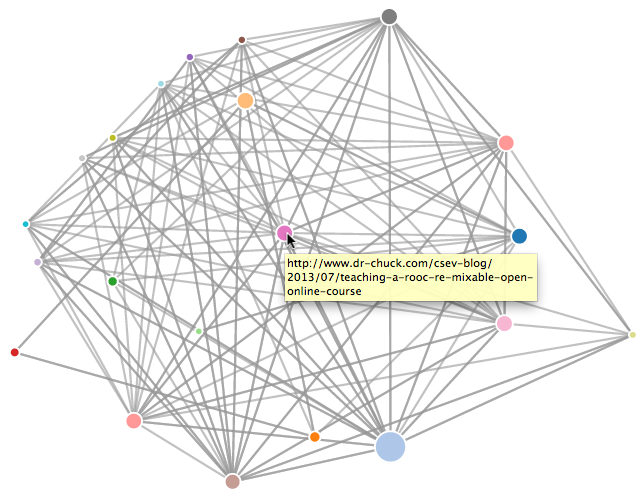
A Page Ranking

The first program (spider.py) program crawls a web site and pulls a series of pages into the database (spider.sqlite), recording the links between pages. You can restart the process at any time by removing the spider.sqlite file and rerunning spider.py.

```
Enter web url or enter: http://www.dr-chuck.com/
['http://www.dr-chuck.com']
How many pages:2
1 http://www.dr-chuck.com/ 12
2 http://www.dr-chuck.com/csev-blog/ 57
How many pages:
```

In this sample run, we told it to crawl a website and retrieve two pages. If you restart the program and tell it to crawl more pages, it will not re-crawl any pages already in the database. Upon restart it goes to a random non-crawled page and starts there. So each successive run of spider.py is additive.

```
Enter web url or enter: http://www.dr-chuck.com/
['http://www.dr-chuck.com']
How many pages:3
3 http://www.dr-chuck.com/csev-blog 57
4 http://www.dr-chuck.com/dr-chuck/resume/speaking.htm 1
5 http://www.dr-chuck.com/dr-chuck/resume/index.htm 13
How many pages:
```

You can have multiple starting points in the same database—within the program, these are called "webs". The spider chooses randomly amongst all non-visited links across all the webs as the next page to spider.

If you want to dump the contents of the spider.sqlite file, you can run spdump.py as follows:

```
(5, None, 1.0, 3, 'http://www.dr-chuck.com/csev-blog')
(3, None, 1.0, 4, 'http://www.dr-chuck.com/dr-chuck/resume/speaking.htm')
(1, None, 1.0, 2, 'http://www.dr-chuck.com/csev-blog/')
(1, None, 1.0, 5, 'http://www.dr-chuck.com/dr-chuck/resume/index.htm')
4 rows.
```

This shows the number of incoming links, the old page rank, the new page rank, the id of the page, and the url of the page. The spdump.py program only shows pages that have at least one incoming link to them.

Once you have a few pages in the database, you can run page rank on the pages using the sprank.py program. You simply tell it how many page rank iterations to run.

```How many iterations:2
1 0.546848992536
2 0.226714939664
[(1, 0.559), (2, 0.659), (3, 0.985), (4, 2.135), (5, 0.659)]
```

You can dump the database again to see that page rank has been updated:


```(5, 1.0, 0.985, 3, 'http://www.dr-chuck.com/csev-blog')
(3, 1.0, 2.135, 4, 'http://www.dr-chuck.com/dr-chuck/resume/speaking.htm')
(1, 1.0, 0.659, 2, 'http://www.dr-chuck.com/csev-blog/')
(1, 1.0, 0.659, 5, 'http://www.dr-chuck.com/dr-chuck/resume/index.htm')
4 rows.
```

You can run sprank.py as many times as you like and it will simply refine the page rank each time you run it. You can even run sprank.py a few times and then go spider a few more pages with spider.py and then run sprank.py to reconverge the page rank values. A search engine usually runs both the crawling and ranking programs all the time.

If you want to restart the page rank calculations without respidering the web pages, you can use spreset.py and then restart sprank.py.

```How many iterations:50
1 0.546848992536
2 0.226714939664
3 0.0659516187242
4 0.0244199333
5 0.0102096489546
6 0.00610244329379
...
42 0.000109076928206
43 9.91987599002e-05
44 9.02151706798e-05
45 8.20451504471e-05
46 7.46150183837e-05
47 6.7857770908e-05
48 6.17124694224e-05
49 5.61236959327e-05
50 5.10410499467e-05
[(512, 0.0296), (1, 12.79), (2, 28.93), (3, 6.808), (4, 13.46)]
```

For each iteration of the page rank algorithm it prints the average change in page rank per page. The network initially is quite unbalanced and so the individual page rank values change wildly between iterations. But in a few short iterations, the page rank converges. You should run sprank.py long enough that the page rank values converge.

If you want to visualize the current top pages in terms of page rank, run spjson.py to read the database and write the data for the most highly linked pages in JSON format to be viewed in a web browser.

```Creating JSON output on spider.json...
How many nodes? 30
Open force.html in a browser to view the visualization
```

You can view this data by opening the file force.html in your web browser. This shows an automatic layout of the nodes and links. You can click and drag any node and you can also double-click on a node to find the URL that is represented by the node.

If you rerun the other utilities, rerun spjson.py and press refresh in the browser to get the new data from spider.json.

### [Video: Worked Example: Page Rank - Spidering](<https://www.youtube.com/watch?v=SbtGozLk5Yk>)

### [Video: Worked Example: Page Rank - Computation](<https://www.youtube.com/watch?v=9gtLOS87ZPs>)

### [Video: Worked Example: Page Rank - Visualization](<https://www.youtube.com/watch?v=vM4kJNePwhI>)


## Visualizing Mail Data

[Video: Visualization - Gmane (Email) Part 3](<https://www.youtube.com/watch?v=vE0_PM2BOiU>)

Up to this point in the book, you have become quite familiar with our mbox-short.txt and mbox.txt data files. Now it is time to take our analysis of email data to the next level.

In the real world, sometimes you have to pull down mail data from servers. That might take quite some time and the data might be inconsistent, error-filled, and need a lot of cleanup or adjustment. In this section, we work with an application that is the most complex so far and pull down nearly a gigabyte of data and visualize it.

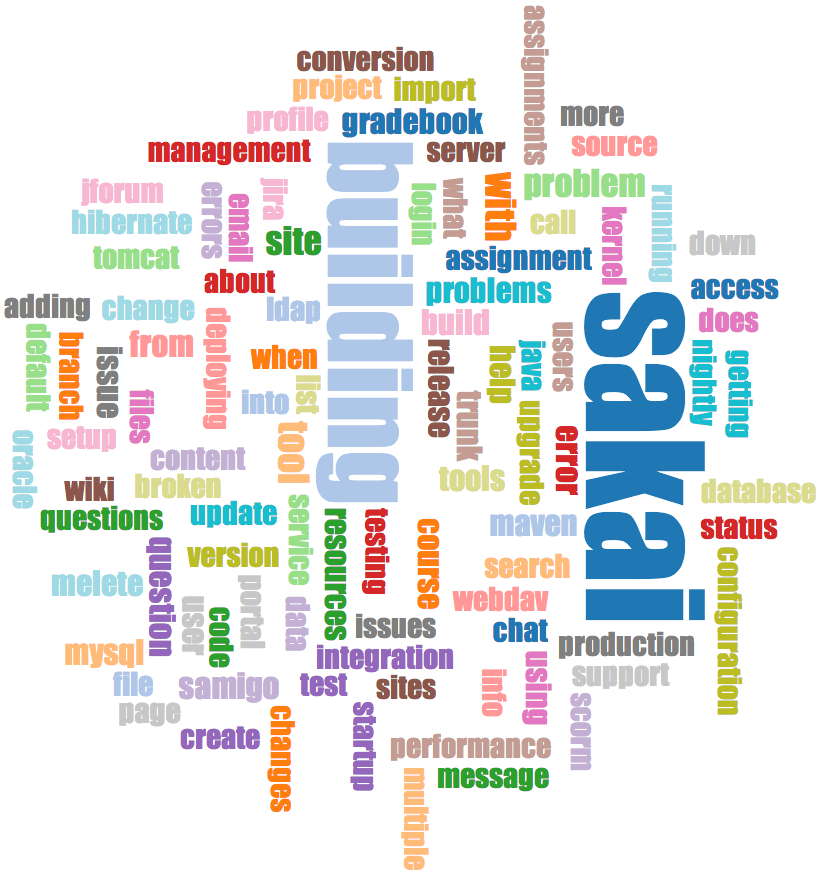
A Word Cloud from the Sakai Developer List

You can download this application from:

https://www.py4e.com/code3/gmane.zip

We will be using data from a free email list archiving service that was called gmane - the service has since been shut down and for the purposes of this course, a partial archive has been kept at http://mbox.dr-chuck.net. The gmane service was very popular with open source projects because it provided a nice searchable archive of their email activity.

http://mbox.dr-chuck.net/export.php

When the Sakai email data was spidered using this software, it produced nearly a Gigabyte of data and took a number of runs on several days. The file README.txt in the above ZIP may have instructions as to how you can download a pre-spidered copy of the content.sqlite file for a majority of the Sakai email corpus so you don't have to spider for five days just to run the programs. If you download the pre-spidered content, you should still run the spidering process to catch up with more recent messages.

The first step is to spider the repository. The base URL is hard-coded in the gmane.py and is hard-coded to the Sakai developer list. You can spider another repository by changing that base url. Make sure to delete the content.sqlite file if you switch the base url.

The gmane.py file operates as a responsible caching spider in that it runs slowly and retrieves one mail message per second so as to avoid getting throttled. It stores all of its data in a database and can be interrupted and restarted as often as needed. It may take many hours to pull all the data down. So you may need to restart several times.

Here is a run of gmane.py retrieving the last five messages of the Sakai developer list:

```How many messages:10
http://mbox.dr-chuck.net/sakai.devel/51410/51411 9460
    nealcaidin@sakaifoundation.org 2013-04-05 re: [building ...
http://mbox.dr-chuck.net/sakai.devel/51411/51412 3379
    samuelgutierrezjimenez@gmail.com 2013-04-06 re: [building ...
http://mbox.dr-chuck.net/sakai.devel/51412/51413 9903
    da1@vt.edu 2013-04-05 [building sakai] melete 2.9 oracle ...
http://mbox.dr-chuck.net/sakai.devel/51413/51414 349265
    m.shedid@elraed-it.com 2013-04-07 [building sakai] ...
http://mbox.dr-chuck.net/sakai.devel/51414/51415 3481
    samuelgutierrezjimenez@gmail.com 2013-04-07 re: ...
http://mbox.dr-chuck.net/sakai.devel/51415/51416 0

Does not start with From
```

The program scans content.sqlite from one up to the first message number not already spidered and starts spidering at that message. It continues spidering until it has spidered the desired number of messages or it reaches a page that does not appear to be a properly formatted message.

Sometimes the repository is missing a message. Perhaps administrators can delete messages or perhaps they get lost. If your spider stops, and it seems it has hit a missing message, go into the SQLite Manager and add a row with the missing id leaving all the other fields blank and restart gmane.py. This will unstick the spidering process and allow it to continue. These empty messages will be ignored in the next phase of the process.

One nice thing is that once you have spidered all of the messages and have them in content.sqlite, you can run gmane.py again to get new messages as they are sent to the list.

The content.sqlite data is pretty raw, with an inefficient data model, and not compressed. This is intentional as it allows you to look at content.sqlite in the SQLite Manager to debug problems with the spidering process. It would be a bad idea to run any queries against this database, as they would be quite slow.

The second process is to run the program gmodel.py. This program reads the raw data from content.sqlite and produces a cleaned-up and well-modeled version of the data in the file index.sqlite. This file will be much smaller (often 10X smaller) than content.sqlite because it also compresses the header and body text.

Each time gmodel.py runs it deletes and rebuilds index.sqlite, allowing you to adjust its parameters and edit the mapping tables in content.sqlite to tweak the data cleaning process. This is a sample run of gmodel.py. It prints a line out each time 250 mail messages are processed so you can see some progress happening, as this program may run for a while processing nearly a Gigabyte of mail data.

```Loaded allsenders 1588 and mapping 28 dns mapping 1
1 2005-12-08T23:34:30-06:00 ggolden22@mac.com
251 2005-12-22T10:03:20-08:00 tpamsler@ucdavis.edu
501 2006-01-12T11:17:34-05:00 lance@indiana.edu
751 2006-01-24T11:13:28-08:00 vrajgopalan@ucmerced.edu
...
```

The gmodel.py program handles a number of data cleaning tasks.

Domain names are truncated to two levels for .com, .org, .edu, and .net. Other domain names are truncated to three levels. So si.umich.edu becomes umich.edu and caret.cam.ac.uk becomes cam.ac.uk. Email addresses are also forced to lower case, and some of the @gmane.org address like the following

```arwhyte-63aXycvo3TyHXe+LvDLADg@public.gmane.org
```

are converted to the real address whenever there is a matching real email address elsewhere in the message corpus.

In the mapping.sqlite database there are two tables that allow you to map both domain names and individual email addresses that change over the lifetime of the email list. For example, Steve Githens used the following email addresses as he changed jobs over the life of the Sakai developer list:

```s-githens@northwestern.edu
sgithens@cam.ac.uk
swgithen@mtu.edu
```

We can add two entries to the Mapping table in mapping.sqlite so gmodel.py will map all three to one address:

```s-githens@northwestern.edu ->  swgithen@mtu.edu
sgithens@cam.ac.uk -> swgithen@mtu.edu
```

You can also make similar entries in the DNSMapping table if there are multiple DNS names you want mapped to a single DNS. The following mapping was added to the Sakai data:

```
iupui.edu -> indiana.edu
```

so all the accounts from the various Indiana University campuses are tracked together.

You can rerun the gmodel.py over and over as you look at the data, and add mappings to make the data cleaner and cleaner. When you are done, you will have a nicely indexed version of the email in index.sqlite. This is the file to use to do data analysis. With this file, data analysis will be really quick.

The first, simplest data analysis is to determine "who sent the most mail?" and "which organization sent the most mail"? This is done using gbasic.py:


```How many to dump? 5
Loaded messages= 51330 subjects= 25033 senders= 1584

Top 5 Email list participants
steve.swinsburg@gmail.com 2657
azeckoski@unicon.net 1742
ieb@tfd.co.uk 1591
csev@umich.edu 1304
david.horwitz@uct.ac.za 1184

Top 5 Email list organizations
gmail.com 7339
umich.edu 6243
uct.ac.za 2451
indiana.edu 2258
unicon.net 2055
```

Note how much more quickly gbasic.py runs compared to gmane.py or even gmodel.py. They are all working on the same data, but gbasic.py is using the compressed and normalized data in index.sqlite. If you have a lot of data to manage, a multistep process like the one in this application may take a little longer to develop, but will save you a lot of time when you really start to explore and visualize your data.

You can produce a simple visualization of the word frequency in the subject lines in the file gword.py:

```Range of counts: 33229 129
Output written to gword.js
```

This produces the file gword.js which you can visualize using gword.htm to produce a word cloud similar to the one at the beginning of this section.

A second visualization is produced by gline.py. It computes email participation by organizations over time.

```Loaded messages= 51330 senders= 1584
Top 10 Oranizations
['gmail.com', 'umich.edu', 'uct.ac.za', 'indiana.edu',
'unicon.net', 'tfd.co.uk', 'berkeley.edu', 'longsight.com',
'stanford.edu', 'ox.ac.uk']
Output written to gline.js
```

Its output is written to gline.js which is visualized using gline.htm.

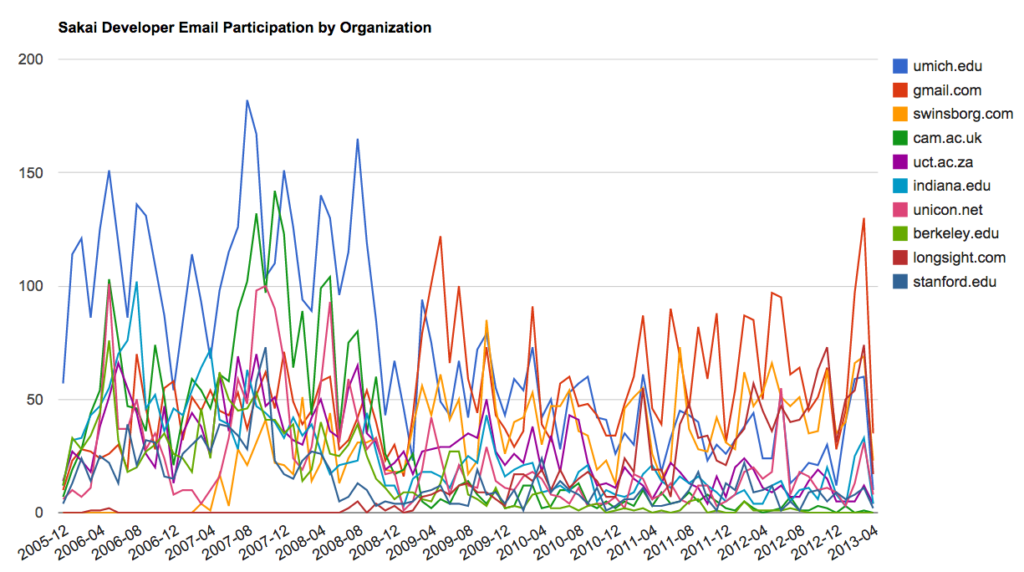
Sakai Mail Activity by Organization

### [Video: Worked Example: Gmane - Spider](<https://www.youtube.com/watch?v=NFS5MLKdNGw>)

### [Video: Worked Example: Gmane - Model](<https://www.youtube.com/watch?v=8GHtT7GqRKk>)

### [Video: Worked Example: Gmane - Visualization](<https://www.youtube.com/watch?v=AQtKm02FQq4>)

